,Algorithm,MB/s_x,Cycles per byte_x,MB/s_y,Cycles per byte_y
0,RNG,102.799313,25.974587,109.798926,24.318277
1,AES-128-CBC-enc,300.872945,8.874739,275.557305,9.689765
2,AES-128-CBC-dec,338.824621,7.880701,307.069507,8.695297
3,AES-192-CBC-enc,260.869799,10.235665,240.866403,11.085350
4,AES-192-CBC-dec,285.649239,9.347741,266.211302,10.029825
5,AES-256-CBC-enc,225.504801,11.840881,213.299727,12.518006
6,AES-256-CBC-dec,250.370804,10.664883,234.897154,11.367013
7,AES-128-GCM-enc,151.703916,17.601226,146.904031,18.175376
8,AES-128-GCM-dec,152.519108,17.507153,145.942575,18.295429
9,AES-192-GCM-enc,142.301289,18.764236,135.249021,19.741984


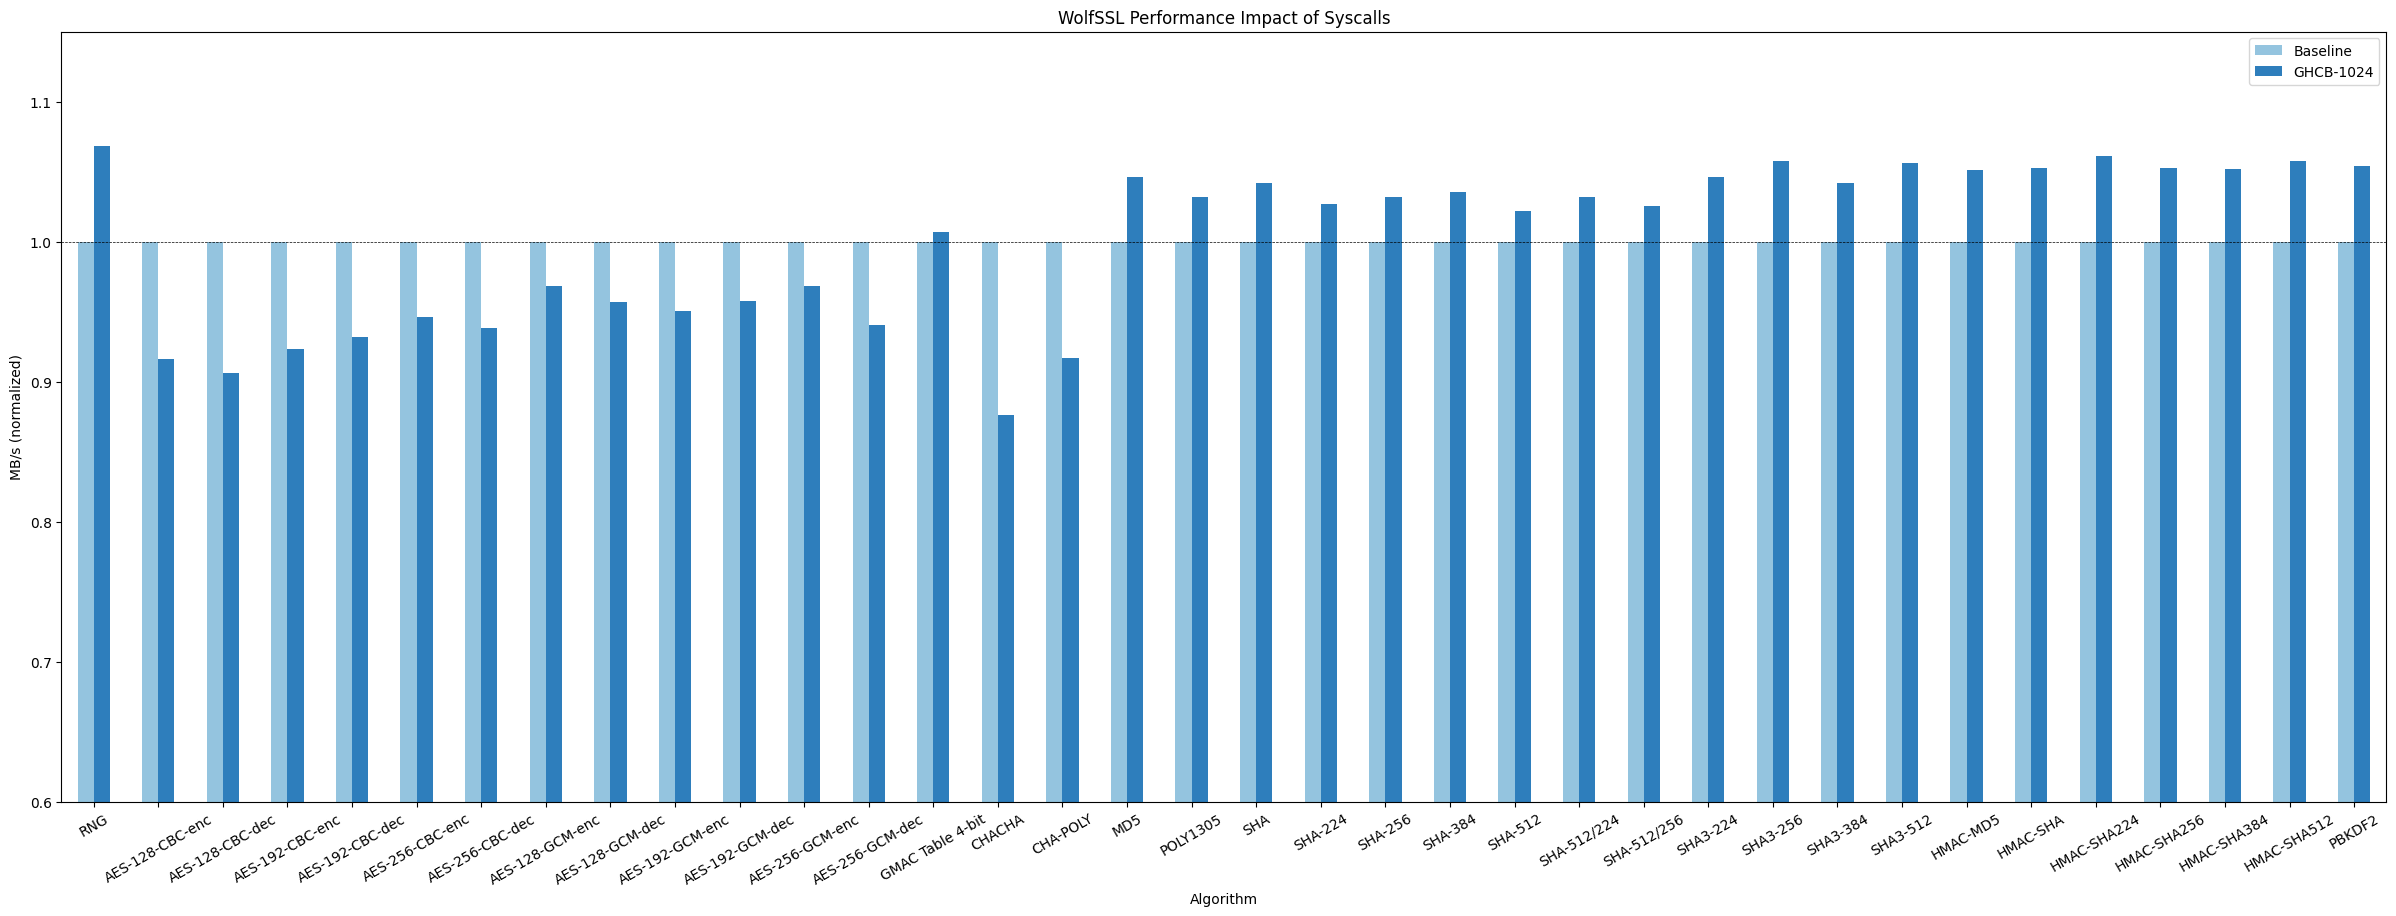

<Figure size 640x480 with 0 Axes>

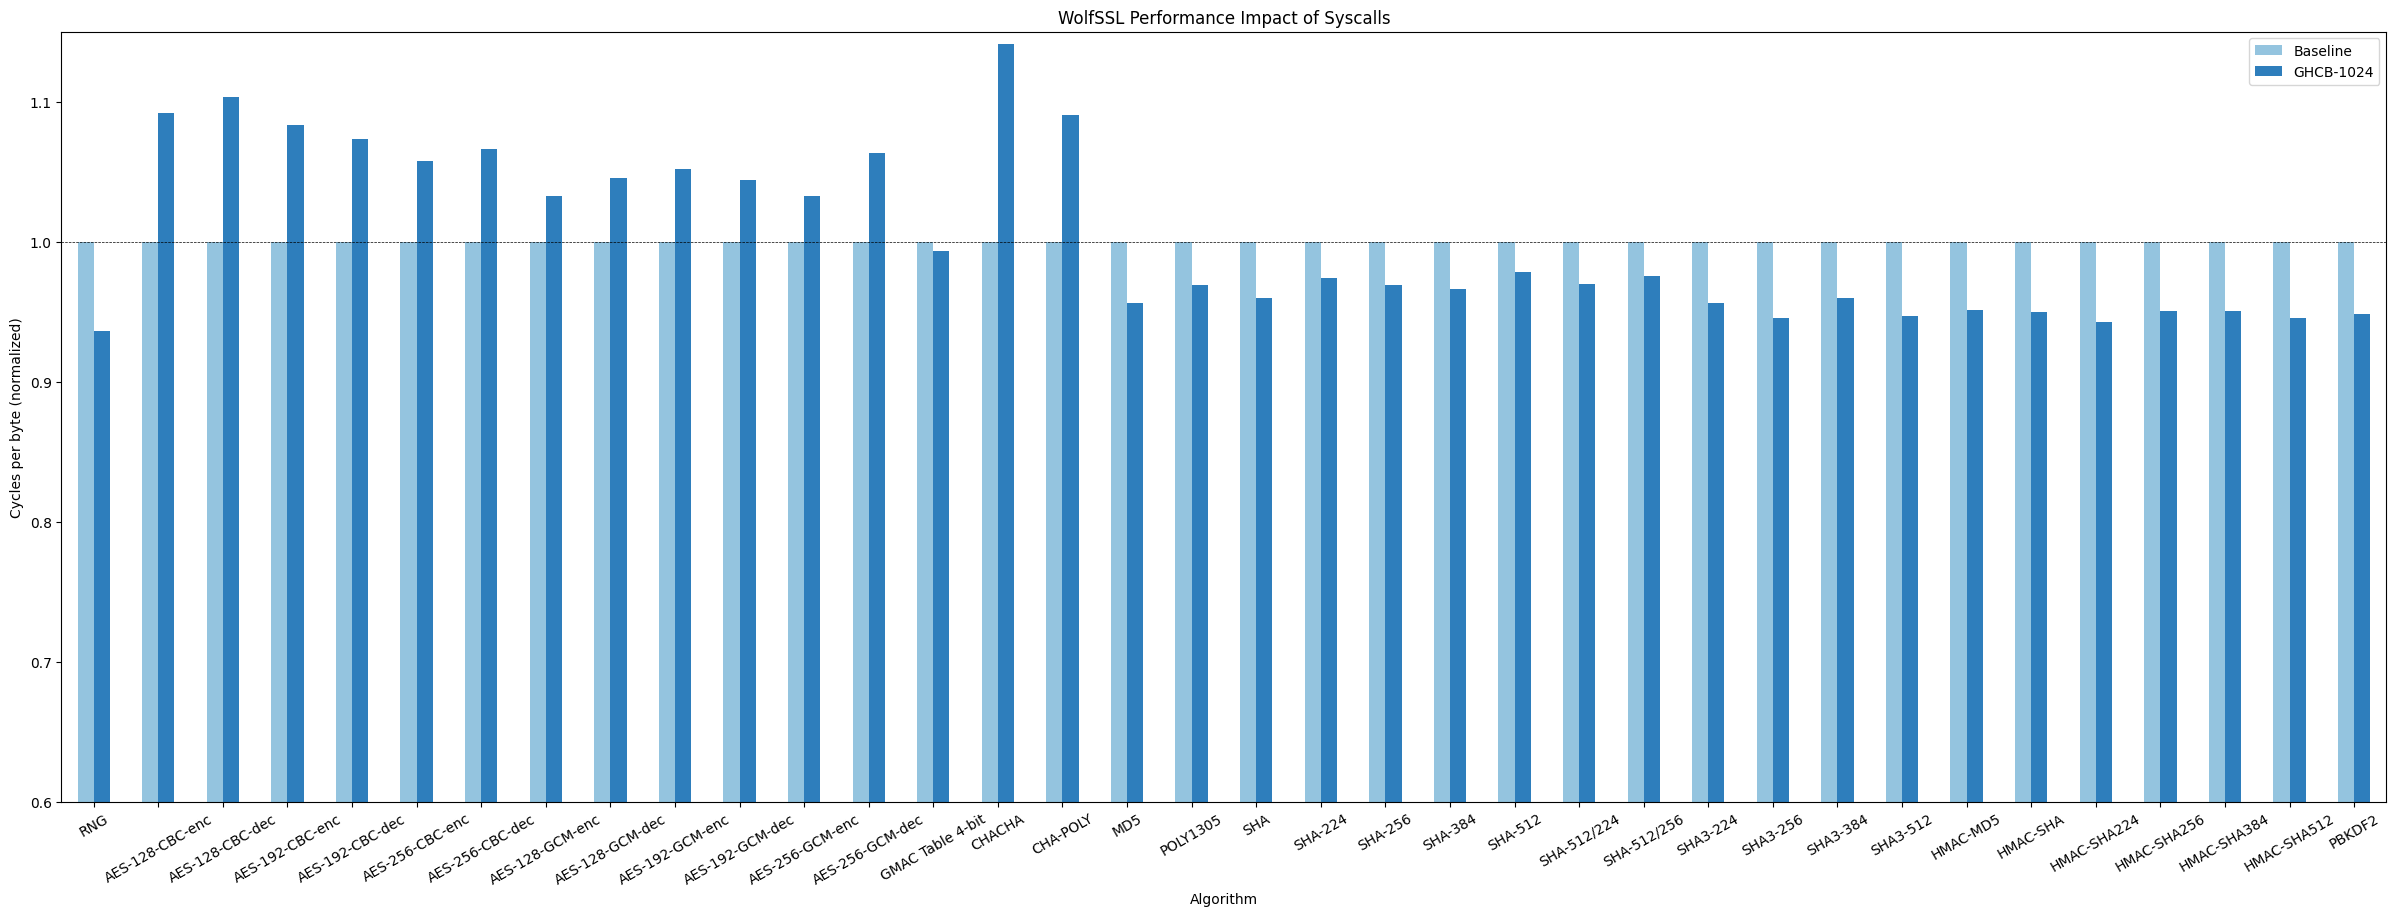

<Figure size 640x480 with 0 Axes>

In [161]:
# In[1]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import re
import numpy as np

# Colors
colors = plt.get_cmap("Blues")

def plot_wolfssl(df, x, y, title, x_label, y_label):
    # draw the plot
    plot=df.plot(x=x, y=y, kind='bar', title=title,
                color=[colors(0.4), colors(0.7), colors(0.9)], figsize=(30, 10), width=0.5, position=0.5)
    # plot horizontal line at y=1.0
    plt.axhline(y=1.0, color='black', linestyle='--', linewidth=0.5)
    # Change column names to be more descriptive
    # 0.6, 0.7, 0.8, 0.9, 1.0
    plt.yticks(np.arange(0.6, 1.1, 0.1))
    # the y start from autofit to 0.5
    plt.ylim(0.6, 1.15)
    # xticks labels rotation angle and alignment 30 degree
    plt.xticks(rotation=30)
    # place legend in the bottom right corner
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.show()
    plt.tight_layout()
    fig = plot.get_figure()
    return fig

SymmetricCiphers_NOVMPL = """
Algorithm,MB/s,Cycles per byte,
RNG,409.213438,6.525322,
AES-128-CBC-enc,1345.077706,1.985199,
AES-128-CBC-dec,10775.596558,0.247805,
AES-192-CBC-enc,1129.113788,2.364907,
AES-192-CBC-dec,8938.263196,0.298744,
AES-256-CBC-enc,969.328637,2.754741,
AES-256-CBC-dec,7646.271938,0.349222,
AES-128-GCM-enc,4805.308462,0.555687,
AES-128-GCM-dec,4855.829892,0.549906,
AES-192-GCM-enc,4544.639186,0.587560,
AES-192-GCM-dec,4565.497966,0.584876,
AES-256-GCM-enc,4136.188553,0.645582,
AES-256-GCM-dec,4200.814513,0.635650,
AES-128-GCM-STREAM-enc,4789.708801,0.557497,
AES-128-GCM-STREAM-dec,4785.372422,0.558002,
AES-192-GCM-STREAM-enc,4547.859603,0.587144,
AES-192-GCM-STREAM-dec,4556.279417,0.586059,
AES-256-GCM-STREAM-enc,4168.344311,0.640602,
AES-256-GCM-STREAM-dec,4155.620765,0.642563,
GMAC Table 4-bit,2159.939234,1.236260,
AES-128-ECB-enc,11067.608783,0.241267,
AES-128-ECB-dec,11173.562454,0.238979,
AES-192-ECB-enc,8351.121852,0.319747,
AES-192-ECB-dec,8915.949270,0.299491,
AES-256-ECB-enc,7400.750293,0.360808,
AES-256-ECB-dec,7528.801843,0.354671,
AES-XTS-enc,7125.659337,0.374737,
AES-XTS-dec,7114.172278,0.375342,
AES-128-CFB,715.715913,3.730875,
AES-192-CFB,649.372969,4.112037,
AES-256-CFB,594.761630,4.489607,
AES-128-OFB,953.910610,2.799261,
AES-192-OFB,838.040518,3.186298,
AES-256-OFB,679.976006,3.926972,
AES-128-CTR,1634.610279,1.633567,
AES-192-CTR,1571.871475,1.698769,
AES-256-CTR,1520.466120,1.756203,
AES-CCM-enc,541.457801,4.931585,
AES-CCM-dec,541.492688,4.931269,
AES-256-SIV-enc,521.904141,5.116351,
AES-256-SIV-dec,524.014764,5.095745,
AES-384-SIV-enc,479.340469,5.570664,
AES-384-SIV-dec,481.795614,5.542277,
AES-512-SIV-enc,443.183439,6.025145,
AES-512-SIV-dec,445.055195,5.999807,
Camellia,180.549481,14.789537,
ARC4,384.374818,6.946979,
CHACHA,3629.623564,0.735681,
CHA-POLY,2393.995440,1.115392,
3DES,32.925307,81.100061,
MD5,691.552381,3.861231,
POLY1305,7014.264174,0.380688,
SHA,749.388419,3.563231,
SHA-224,1751.234742,1.524778,
SHA-256,1691.392039,1.578726,
SHA-384,779.807386,3.424236,
SHA-512,776.368510,3.439401,
SHA-512/224,778.880417,3.428310,
SHA-512/256,778.680757,3.429188,
SHA3-224,478.661693,5.578559,
SHA3-256,452.745396,5.897891,
SHA3-384,346.787365,7.699943,
SHA3-512,240.659999,11.095492,
SHAKE128,557.636002,4.788505,
SHAKE256,453.524261,5.887762,
RIPEMD,287.999598,9.271685,
BLAKE2b,534.824671,4.992745,
BLAKE2s,395.475649,6.751975,
AES-128-CMAC,772.526033,3.456508,
AES-256-CMAC,634.188346,4.210488,
HMAC-MD5,692.661734,3.855046,
HMAC-SHA,748.990704,3.565121,
HMAC-SHA224,1749.976635,1.525873,
HMAC-SHA256,1749.678790,1.526133,
HMAC-SHA384,773.022797,3.454286,
HMAC-SHA512,777.280272,3.435365,
PBKDF2,192.073921,14235.798337,
SipHash-8,3031.333610,0.880880,
SipHash-16,3136.482369,0.851349,
"""

SymmetricCiphers_VMPL = """
Algorithm,MB/s,Cycles per byte,
RNG,107.742906,24.783211,
AES-128-CBC-enc,278.779018,9.578266,
AES-128-CBC-dec,309.194928,8.636030,
AES-192-CBC-enc,244.350194,10.927838,
AES-192-CBC-dec,267.956421,9.965118,
AES-256-CBC-enc,216.249726,12.347849,
AES-256-CBC-dec,234.839924,11.370380,
AES-128-GCM-enc,149.534672,17.856855,
AES-128-GCM-dec,144.389093,18.493218,
AES-192-GCM-enc,138.675078,19.255214,
AES-192-GCM-dec,134.936655,19.788682,
AES-256-GCM-enc,128.672627,20.752027,
AES-256-GCM-dec,125.460305,21.283359,
AES-128-GCM-STREAM-enc,148.143292,18.024573,
AES-128-GCM-STREAM-dec,144.758374,18.446034,
AES-192-GCM-STREAM-enc,137.880496,19.366187,
AES-192-GCM-STREAM-dec,137.220360,19.459344,
AES-256-GCM-STREAM-enc,127.263398,20.981836,
AES-256-GCM-STREAM-dec,128.067614,20.850073,
GMAC Table 4-bit,377.759977,7.068554,
AES-128-ECB-enc,359.489786,7.427804,
AES-128-ECB-dec,371.873365,7.180455,
AES-192-ECB-enc,302.996584,8.812701,
AES-192-ECB-dec,313.332852,8.521988,
AES-256-ECB-enc,259.919546,10.273256,
AES-256-ECB-dec,270.677095,9.864962,
AES-XTS-enc,191.875727,13.916402,
AES-XTS-dec,201.331652,13.262791,
AES-128-CFB,252.462377,10.576704,
AES-192-CFB,223.104177,11.968488,
AES-256-CFB,200.717242,13.303389,
AES-128-OFB,294.270551,9.074030,
AES-192-OFB,255.351407,10.457044,
AES-256-OFB,225.711681,11.830223,
AES-128-CTR,261.021423,10.229892,
AES-192-CTR,230.698775,11.574495,
AES-256-CTR,205.104070,13.018857,
AES-CCM-enc,140.285718,19.034161,
AES-CCM-dec,138.083271,19.337749,
AES-256-SIV-enc,133.207670,20.045549,
AES-256-SIV-dec,132.973053,20.080899,
AES-384-SIV-enc,117.095085,22.803856,
AES-384-SIV-dec,116.735890,22.874035,
AES-512-SIV-enc,103.852652,25.711619,
AES-512-SIV-dec,103.708998,25.747234,
Camellia,181.247024,14.732498,
ARC4,383.936607,6.954848,
CHACHA,619.956310,4.307111,
CHA-POLY,533.814595,5.002152,
3DES,33.028921,80.844939,
MD5,694.097110,3.847042,
POLY1305,3816.856827,0.699586,
SHA,751.135888,3.554911,
SHA-224,251.510766,10.616725,
SHA-256,252.341462,10.581773,
SHA-384,412.110815,6.479373,
SHA-512,413.319840,6.460422,
SHA-512/224,412.452597,6.474008,
SHA-512/256,411.515713,6.488748,
SHA3-224,459.574098,5.810205,
SHA3-256,435.636473,6.129467,
SHA3-384,334.752346,7.976703,
SHA3-512,232.214842,11.498927,
SHAKE128,534.940949,4.991613,
SHAKE256,434.711250,6.142515,
RIPEMD,288.563548,9.253492,
BLAKE2b,499.709179,5.343550,
BLAKE2s,345.273455,7.733638,
AES-128-CMAC,276.015829,9.674161,
AES-256-CMAC,213.352765,12.515505,
HMAC-MD5,691.628678,3.860774,
HMAC-SHA,741.924967,3.599045,
HMAC-SHA224,251.201290,10.629812,
HMAC-SHA256,252.105505,10.591671,
HMAC-SHA384,411.544610,6.488294,
HMAC-SHA512,411.691882,6.485971,
PBKDF2,30.628756,89272.509174,
SipHash-8,3106.712782,0.859500,
SipHash-16,3134.234059,0.851954,
"""

SymmetricCiphers_VMPL_MM = """
Algorithm,MB/s,Cycles per byte,
RNG,107.017629,24.948668,
AES-128-CBC-enc,278.106902,9.600470,
AES-128-CBC-dec,309.108485,8.637620,
AES-192-CBC-enc,244.975352,10.898938,
AES-192-CBC-dec,266.900450,10.003648,
AES-256-CBC-enc,215.912174,12.366062,
AES-256-CBC-dec,234.684089,11.376950,
AES-128-GCM-enc,149.317617,17.881323,
AES-128-GCM-dec,144.977083,18.416722,
AES-192-GCM-enc,138.442584,19.286028,
AES-192-GCM-dec,134.441407,19.860051,
AES-256-GCM-enc,128.678609,20.749494,
AES-256-GCM-dec,125.913511,21.205220,
AES-128-GCM-STREAM-enc,148.804647,17.943184,
AES-128-GCM-STREAM-dec,148.625509,17.964827,
AES-192-GCM-STREAM-enc,138.195093,19.320771,
AES-192-GCM-STREAM-dec,137.350481,19.439626,
AES-256-GCM-STREAM-enc,128.385926,20.797024,
AES-256-GCM-STREAM-dec,128.917955,20.711233,
GMAC Table 4-bit,376.953895,7.083230,
AES-128-ECB-enc,356.381838,7.492130,
AES-128-ECB-dec,363.738108,7.340618,
AES-192-ECB-enc,297.439329,8.976848,
AES-192-ECB-dec,308.299320,8.660644,
AES-256-ECB-enc,256.894569,10.393658,
AES-256-ECB-dec,260.785372,10.238595,
AES-XTS-enc,185.839864,14.367644,
AES-XTS-dec,197.951020,13.488602,
AES-128-CFB,248.537209,10.743207,
AES-192-CFB,222.610849,11.994425,
AES-256-CFB,199.876956,13.358678,
AES-128-OFB,293.108907,9.109566,
AES-192-OFB,253.662652,10.526181,
AES-256-OFB,223.905484,11.925125,
AES-128-CTR,259.758839,10.279165,
AES-192-CTR,229.628045,11.627960,
AES-256-CTR,204.089982,13.083002,
AES-CCM-enc,137.453204,19.425596,
AES-CCM-dec,129.882421,20.557919,
AES-256-SIV-enc,126.343415,21.133779,
AES-256-SIV-dec,125.656188,21.249363,
AES-384-SIV-enc,110.235940,24.221846,
AES-384-SIV-dec,108.979116,24.501208,
AES-512-SIV-enc,98.141139,27.206934,
AES-512-SIV-dec,97.381546,27.419176,
Camellia,170.295610,15.679351,
ARC4,364.567521,7.324065,
CHACHA,579.600362,4.606548,
CHA-POLY,491.194049,5.435999,
3DES,31.270566,85.388071,
MD5,648.908353,4.114807,
POLY1305,3579.043439,0.746047,
SHA,709.410728,3.763878,
SHA-224,235.183682,11.353399,
SHA-256,235.293407,11.348120,
SHA-384,389.080245,6.862689,
SHA-512,385.258831,6.930763,
SHA-512/224,385.702406,6.922809,
SHA-512/256,387.766667,6.885957,
SHA3-224,431.321079,6.190606,
SHA3-256,412.132087,6.478860,
SHA3-384,313.153915,8.526616,
SHA3-512,217.997623,12.248483,
SHAKE128,505.210842,5.285214,
SHAKE256,407.946023,6.545349,
RIPEMD,270.373747,9.875777,
BLAKE2b,507.757868,5.258711,
BLAKE2s,5.923732,450.757822,
AES-128-CMAC,259.914050,10.273243,
AES-256-CMAC,199.479318,13.385647,
HMAC-MD5,655.493613,4.073506,
HMAC-SHA,703.593753,3.795030,
HMAC-SHA224,237.364450,11.249199,
HMAC-SHA256,238.275046,11.206200,
HMAC-SHA384,386.527038,6.908078,
HMAC-SHA512,389.855650,6.849103,
PBKDF2,28.676643,95347.443219,
SipHash-8,2970.697263,0.898833,
SipHash-16,2948.873688,0.905485,
"""

SymmetricCiphers_NOAES_NOVMPL = """
Algorithm,MB/s,Cycles per byte,
RNG,102.799313,25.974587,
AES-128-CBC-enc,300.872945,8.874739,
AES-128-CBC-dec,338.824621,7.880701,
AES-192-CBC-enc,260.869799,10.235665,
AES-192-CBC-dec,285.649239,9.347741,
AES-256-CBC-enc,225.504801,11.840881,
AES-256-CBC-dec,250.370804,10.664883,
AES-128-GCM-enc,151.703916,17.601226,
AES-128-GCM-dec,152.519108,17.507153,
AES-192-GCM-enc,142.301289,18.764236,
AES-192-GCM-dec,140.509223,19.003535,
AES-256-GCM-enc,129.984474,20.542250,
AES-256-GCM-dec,131.000920,20.382852,
GMAC Table 4-bit,356.947832,7.480570,
CHACHA,514.310985,5.191751,
CHA-POLY,363.974541,7.336120,
MD5,653.771112,4.084262,
POLY1305,1226.423046,2.177203,
SHA,712.449534,3.747878,
SHA-224,239.607709,11.143937,
SHA-256,238.033725,11.217628,
SHA-384,390.942195,6.830097,
SHA-512,393.433229,6.786850,
SHA-512/224,391.445329,6.816398,
SHA-512/256,394.796874,6.763405,
SHA3-224,436.874604,6.111988,
SHA3-256,412.470776,6.473606,
SHA3-384,321.275875,8.311147,
SHA3-512,220.501187,12.109560,
HMAC-MD5,659.479734,4.048908,
HMAC-SHA,717.272374,3.722646,
HMAC-SHA224,236.394207,11.295411,
HMAC-SHA256,238.213810,11.209136,
HMAC-SHA384,391.931772,6.812845,
HMAC-SHA512,389.936317,6.847708,
PBKDF2,29.191016,93667.716845,
"""

SymmetricCiphers_NOAES_VMPL_MM = """
Algorithm,MB/s,Cycles per byte,
RNG,109.798926,24.318277,
AES-128-CBC-enc,275.557305,9.689765,
AES-128-CBC-dec,307.069507,8.695297,
AES-192-CBC-enc,240.866403,11.085350,
AES-192-CBC-dec,266.211302,10.029825,
AES-256-CBC-enc,213.299727,12.518006,
AES-256-CBC-dec,234.897154,11.367013,
AES-128-GCM-enc,146.904031,18.175376,
AES-128-GCM-dec,145.942575,18.295429,
AES-192-GCM-enc,135.249021,19.741984,
AES-192-GCM-dec,134.570522,19.841502,
AES-256-GCM-enc,125.894992,21.209041,
AES-256-GCM-dec,123.176740,21.677033,
GMAC Table 4-bit,359.306111,7.431275,
CHACHA,450.673674,5.924722,
CHA-POLY,333.785202,7.999446,
MD5,683.685866,3.905461,
POLY1305,1265.298162,2.110260,
SHA,742.259643,3.597267,
SHA-224,246.011027,10.853615,
SHA-256,245.623660,10.870725,
SHA-384,404.635141,6.598821,
SHA-512,402.092566,6.640477,
SHA-512/224,403.857937,6.611490,
SHA-512/256,404.711493,6.597535,
SHA3-224,457.062220,5.841879,
SHA3-256,436.169289,6.121632,
SHA3-384,334.724993,7.977001,
SHA3-512,232.795595,11.469762,
HMAC-MD5,693.364248,3.850950,
HMAC-SHA,755.177585,3.535750,
HMAC-SHA224,250.840735,10.644665,
HMAC-SHA256,250.659083,10.652365,
HMAC-SHA384,412.261520,6.476730,
HMAC-SHA512,412.376868,6.474949,
PBKDF2,30.775718,88842.574239,
"""

AsymmetricCiphers_NOAES_NOVMPL = """
Algorithm,key size,operation,avg ms,ops/sec,
RSA,2048,public,0.017,58546.246,
RSA,2048,private,0.558,1792.566,
DH,2048,key gen,0.264,3786.344,
DH,2048,agree,0.267,3748.419,
ECC   [      SECP256R1],256,key gen,0.016,60922.799,
ECDHE [      SECP256R1],256,agree,0.056,17763.755,
ECDSA [      SECP256R1],256,sign,0.023,43902.801,
ECDSA [      SECP256R1],256,verify,0.057,17534.095,
Benchmark complete
"""

AsymmetricCiphers_NOAES_VMPL_MM = """
Algorithm,key size,operation,avg ms,ops/sec,
RSA,2048,public,0.021,48058.842,
RSA,2048,private,0.688,1453.207,
"""

# Read the table from the string
df0 = pd.read_csv(io.StringIO(SymmetricCiphers_NOAES_NOVMPL), sep=',')
df1 = pd.read_csv(io.StringIO(SymmetricCiphers_NOAES_VMPL_MM), sep=',')

# Drop last column
df0 = df0.drop(df0.columns[3], axis=1)
df1 = df1.drop(df1.columns[3], axis=1)

df0.set_index('Algorithm')
df1.set_index('Algorithm')

df0.to_csv('wolfssl-novmpl.csv', sep=',')
df1.to_csv('wolfssl-vmpl.csv', sep=',')

# Merge the two tables
df = df0.merge(df1, on='Algorithm')
display(df)

# Normalize the data
df['MB/s_y'] = df['MB/s_y'] / df['MB/s_x']
df['Cycles per byte_y'] = df['Cycles per byte_y'] / df['Cycles per byte_x']
df['MB/s_x'] = df['MB/s_x'] / df['MB/s_x']
df['Cycles per byte_x'] = df['Cycles per byte_x'] / df['Cycles per byte_x']

# save as csv
df.to_csv('wolfssl-noasm.csv', sep=',')

# filter out the algothims which has less than 1.5x performance impact
# df = df[(df['MB/s_y'] > 0.7)]
# Select MB/s_x, MB/s_y columns and plot the graph
df1 = df[['Algorithm', 'MB/s_x', 'MB/s_y']]
# Change column names to be more descriptive
df1.columns = ['Algorithm', 'Baseline', 'GHCB-1024']

# filter out the algothims which has less than 1.5x performance impact
# df = df[(df['Cycles per byte_x'] < 1.3)]
# Select Cycles per byte columns and plot the graph
df2 = df[['Algorithm', 'Cycles per byte_x', 'Cycles per byte_y']]
# Change column names to be more descriptive
df2.columns = ['Algorithm', 'Baseline', 'GHCB-1024']

# plot the throughput
f = plot_wolfssl(df1, 'Algorithm', ['Baseline', 'GHCB-1024'], 'WolfSSL Performance Impact of Syscalls', 'Algorithm', "MB/s (normalized)")
# save as pdf
f.savefig("wolfssl-throughput-noasm.pdf")

# plot the performance of the algorithms, in terms of cycles per byte
f = plot_wolfssl(df2, 'Algorithm', ['Baseline', 'GHCB-1024'], 'WolfSSL Performance Impact of Syscalls', 'Algorithm', "Cycles per byte (normalized)")
# compact
plt.tight_layout()
# save as pdf
f.savefig("wolfssl-cycles-noasm.pdf")